<a href="https://colab.research.google.com/github/SaurabhSRP/POC-CNN/blob/main/POC_CNN_Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:51<00:00, 22.2MB/s]
100% 1.06G/1.06G [00:51<00:00, 22.2MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [8]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

#we will invoke only the convolution part of the CNN network and not NN network 
##so include_top is False

58889256/58889256 [==============================] - 3s 0us/step


In [9]:
conv_base.summary()
##we can see that only convolution arch has been created in our model

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [10]:
#Lets create the model 
model = Sequential()

model.add(conv_base) ##convolution layer
model.add(Flatten())
model.add(Dense(256,activation='relu')) #NN layer
model.add(Dense(1,activation='sigmoid')) ##NN layer

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [12]:
conv_base.trainable = False ##this will freeze the weights of VGG16 and we dont need to train again

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [15]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [16]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 75s 103ms/step - loss: 0.2831 - accuracy: 0.8827 - val_loss: 0.2449 - val_accuracy: 0.8992
Epoch 2/10
625/625 [==============================] - 64s 101ms/step - loss: 0.1919 - accuracy: 0.9196 - val_loss: 0.2180 - val_accuracy: 0.9082
Epoch 3/10
625/625 [==============================] - 64s 101ms/step - loss: 0.1652 - accuracy: 0.9334 - val_loss: 0.2209 - val_accuracy: 0.9078
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.1369 - accuracy: 0.9449 - val_loss: 0.2577 - val_accuracy: 0.9032
Epoch 5/10
625/625 [==============================] - 64s 101ms/step - loss: 0.1198 - accuracy: 0.9532 - val_loss: 0.2317 - val_accuracy: 0.9138
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.0987 - accuracy: 0.9616 - val_loss: 0.2621 - val_accuracy: 0.9106
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.0781 - accuracy: 0.9708 - val_loss: 0.2869 - val_ac

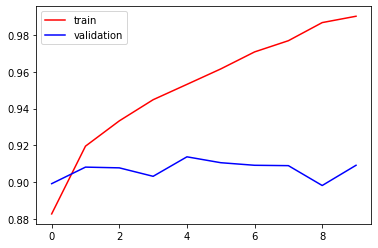

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

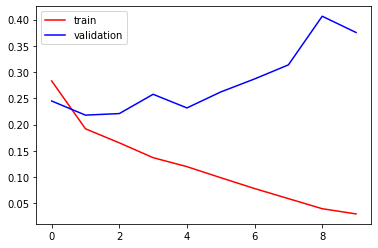

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()